## PFA
### Implémentation
---
*Importation des bibliothèques*

In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

**Chargement des données à partir du Google Drive**

*Assemblage Google Drive dans Colaboratory*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip Dataset_Final_Bruit.zip

In [ ]:
cd /content/drive/MyDrive/Dataset_Final_Bruit/

/content/drive/MyDrive/Dataset_Final_Bruit


In [ ]:
ls

c_Acuracy.png  model.png  Test/  Train/  Validation/


*Ensemble d'apprentissage* 

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(directory="Train",image_size=(32,32),
                                                             color_mode='rgb',batch_size=128)

Found 8400 files belonging to 2 classes.


**1.**  Décompresser le fichier du dataset *Dataset Final.zip*



**2.**  Charger les données d’apprentissage, de validation et de test de la base de données **Dataset_Final** 

Ensemble de validation

In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(directory="Validation",image_size=(32,32),
                                                             color_mode='rgb',batch_size=128)

Found 2100 files belonging to 2 classes.


*Ensemble de test*

In [ ]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(directory="Test",image_size=(32,32),
                                                             color_mode='rgb',batch_size=128)

Found 2500 files belonging to 2 classes.


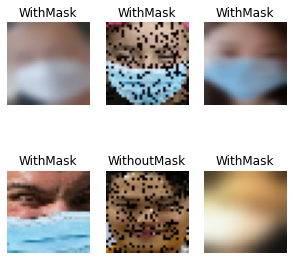

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(5, 5))
for image,labels in train_ds.take(1):
  for i in range(6):
    ax=plt.subplot(2,3,i+1)
    img=image[i].numpy().astype("uint8")
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model=tf.keras.applications.vgg16.VGG16(include_top=True,classes=2,weights="/content/drive/MyDrive/checkpoint16.h5",input_shape=(32,32,3))


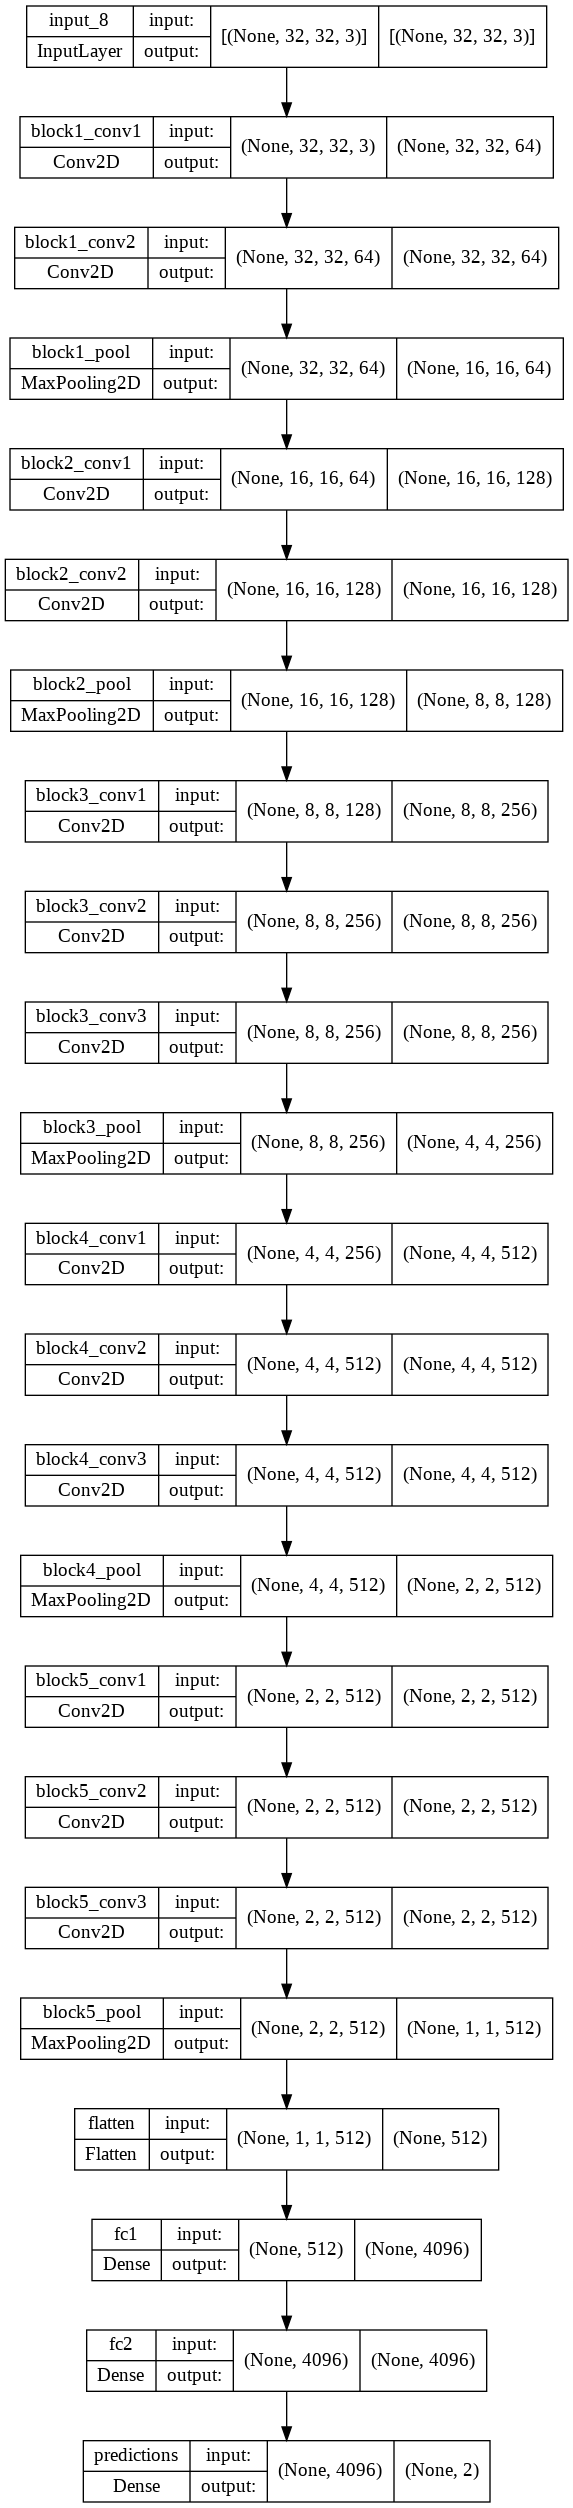

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

**Spécifier l’optimiseur à adam, le nombre d’époques à 50 **

In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
history_vgg16=model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 16s 213ms/step - loss: 0.1745 - accuracy: 0.9374 - val_loss: 0.0954 - val_accuracy: 0.9724
Epoch 2/10
66/66 [==============================] - 4s 66ms/step - loss: 0.1188 - accuracy: 0.9602 - val_loss: 0.0692 - val_accuracy: 0.9776
Epoch 3/10
66/66 [==============================] - 4s 66ms/step - loss: 0.1069 - accuracy: 0.9648 - val_loss: 0.0625 - val_accuracy: 0.9805
Epoch 4/10
66/66 [==============================] - 4s 66ms/step - loss: 0.1440 - accuracy: 0.9576 - val_loss: 0.1367 - val_accuracy: 0.9705
Epoch 5/10
66/66 [==============================] - 4s 66ms/step - loss: 0.1212 - accuracy: 0.9598 - val_loss: 0.0614 - val_accuracy: 0.9824
Epoch 6/10
66/66 [==============================] - 4s 66ms/step - loss: 0.1071 - accuracy: 0.9632 - val_loss: 0.0685 - val_accuracy: 0.9795
Epoch 7/10
66/66 [==============================] - 4s 66ms/step - loss: 0.1109 - accuracy: 0.9664 - val_loss: 0.0756 - val_accuracy: 0.9786
Epoch 8/10
66/66 [====

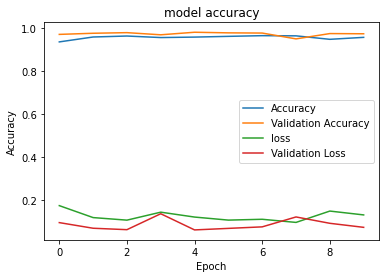

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_vgg16.history["accuracy"])
plt.plot(history_vgg16.history['val_accuracy'])
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


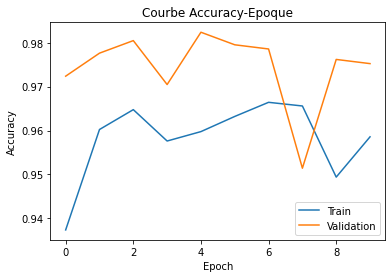

In [ ]:
print(history_vgg16.history.keys())
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Courbe Accuracy-Epoque')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
#plt.savefig('c_Acuracy.png')
plt.show()

In [ ]:
results_vgg16 = model.evaluate(test_ds,verbose=0)
print('Test Accuracy: {:.2f}%'.format(results_vgg16[1]*100))

Test Accuracy: 97.16%


In [ ]:
apprentissage_vgg16= model.evaluate(train_ds,verbose=0)
print('train Accuracy: {:.2f}%'.format(apprentissage_vgg16[1]*100))

train Accuracy: 96.61%


In [ ]:
validation_vgg16 = model.evaluate(val_ds,verbose=0)
print('val Accuracy: {:.2f}%'.format(validation_vgg16[1]*100))

val Accuracy: 97.52%


**3.**<br>
$\clubsuit$ ***modèle VGG19***

In [ ]:
model_vgg19=tf.keras.applications.vgg19.VGG19(include_top=True,classes=2,weights="/content/drive/MyDrive/checkpoint19.h5",input_shape=(32,32,3))

In [ ]:
model_vgg19.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model_vgg19.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fbe45715750>>

In [ ]:
history_vgg19=model_vgg19.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 6s 83ms/step - loss: 0.6981 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
66/66 [==============================] - 5s 80ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
66/66 [==============================] - 5s 79ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
66/66 [==============================] - 5s 78ms/step - loss: 0.6933 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
66/66 [==============================] - 5s 78ms/step - loss: 0.6933 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
66/66 [==============================] - 5s 79ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
66/66 [==============================] - 5s 79ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
66/66 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


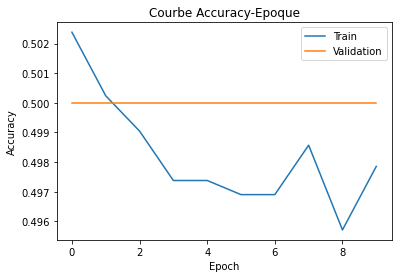

In [ ]:
print(history_vgg19.history.keys())
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('Courbe Accuracy-Epoque')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.savefig('c_Acuracy.png')
plt.show()

In [ ]:
results_vgg19 = model_vgg19.evaluate(test_ds,verbose=0)
print('Test Accuracy: {:.2f}%'.format(results_vgg19[1]*100))

Test Accuracy: 50.00%


In [ ]:
apprentissage_vgg19= model_vgg19.evaluate(train_ds,verbose=0)
print('train Accuracy: {:.2f}%'.format(apprentissage_vgg19[1]*100))

train Accuracy: 50.00%


In [ ]:
validation_vgg19 = model_vgg19.evaluate(val_ds,verbose=0)
print('val Accuracy: {:.2f}%'.format(validation_vgg19[1]*100))

val Accuracy: 50.00%


**3.**<br>
$\clubsuit$ ***modèle RESNET50***

In [ ]:
model_resnet50=tf.keras.applications.resnet50.ResNet50(
include_top=True,classes=2,𝐰𝐞𝐢𝐠𝐡𝐭𝐬="/content/drive/MyDrive/checkpoint50.h5", input_shape=(32,32,3),
 𝐩𝐨𝐨𝐥𝐢𝐧𝐠=None,  classifier_activation='softmax')

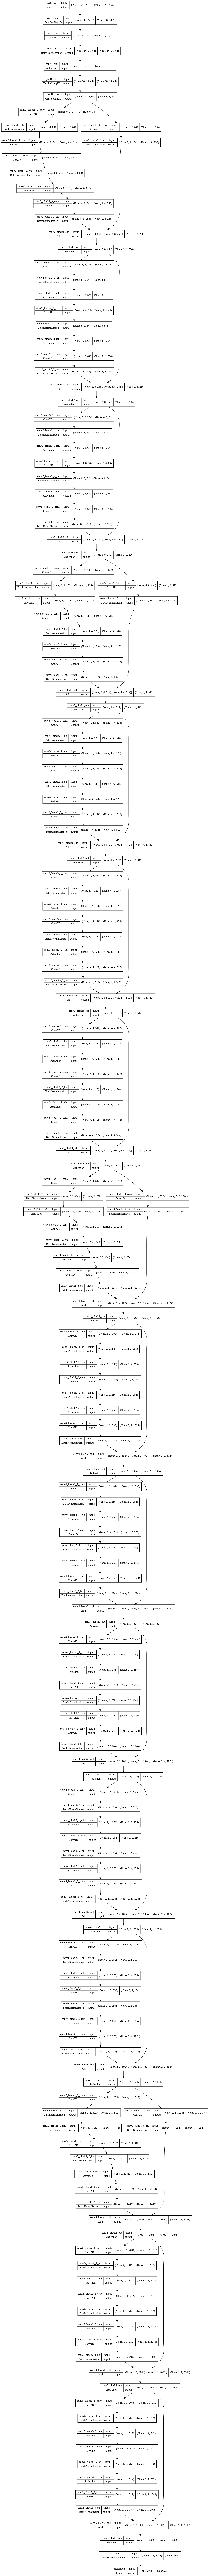

In [ ]:
tf.keras.utils.plot_model(model_resnet50,show_shapes=True)

In [ ]:
model_resnet50.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model_resnet50.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fbe45058590>>

In [ ]:
history_resnet50=model_resnet50.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 10s 81ms/step - loss: 0.2561 - accuracy: 0.9120 - val_loss: 355.4761 - val_accuracy: 0.5000
Epoch 2/10
66/66 [==============================] - 5s 68ms/step - loss: 0.1205 - accuracy: 0.9582 - val_loss: 0.2466 - val_accuracy: 0.9671
Epoch 3/10
66/66 [==============================] - 4s 67ms/step - loss: 0.0844 - accuracy: 0.9702 - val_loss: 0.2341 - val_accuracy: 0.9500
Epoch 4/10
66/66 [==============================] - 4s 68ms/step - loss: 0.0746 - accuracy: 0.9743 - val_loss: 0.1947 - val_accuracy: 0.9419
Epoch 5/10
66/66 [==============================] - 4s 68ms/step - loss: 0.0618 - accuracy: 0.9801 - val_loss: 0.2654 - val_accuracy: 0.9367
Epoch 6/10
66/66 [==============================] - 4s 68ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.3249 - val_accuracy: 0.9162
Epoch 7/10
66/66 [==============================] - 4s 68ms/step - loss: 0.0390 - accuracy: 0.9864 - val_loss: 0.1597 - val_accuracy: 0.9619
Epoch 8/10
66/66 [===

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


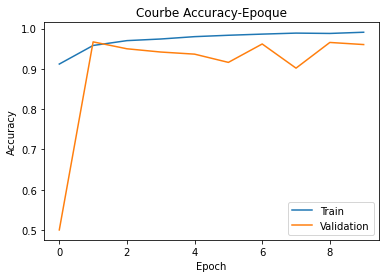

In [ ]:
print(history_resnet50.history.keys())
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('Courbe Accuracy-Epoque')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
#plt.savefig('c_Acuracy.png')
plt.show()

In [ ]:
results_resnet50 = model_resnet50.evaluate(test_ds,verbose=0)
print('Test Accuracy: {:.2f}%'.format(results_resnet50[1]*100))

Test Accuracy: 96.08%


In [ ]:
apprentissage_resnet50= model_resnet50.evaluate(train_ds,verbose=0)
print('train Accuracy: {:.2f}%'.format(apprentissage_resnet50[1]*100))

train Accuracy: 98.45%


In [ ]:
validation_resnet50 = model_resnet50.evaluate(val_ds,verbose=0)
print('val Accuracy: {:.2f}%'.format(validation_resnet50[1]*100))

val Accuracy: 96.05%


**3.**<br>
$\clubsuit$ ***modèle RESNET152***

In [ ]:

model_resnet152=tf.keras.applications.resnet.ResNet152(
include_top=True,classes=2,𝐰𝐞𝐢𝐠𝐡𝐭𝐬="/content/drive/MyDrive/checkpoint152.h5", input_shape=(32,32,3),
 𝐩𝐨𝐨𝐥𝐢𝐧𝐠=None,  classifier_activation='softmax')

ValueError: ignored

In [ ]:
tf.keras.utils.plot_model(model_resnet152,show_shapes=True)

In [ ]:
model_resnet152.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model_resnet152.summary

In [ ]:
history_resnet152=model_resnet152.fit(train_ds,validation_data=val_ds,epochs=10)

In [ ]:
print(history_resnet152.history.keys())
plt.plot(history_resnet152.history['accuracy'])
plt.plot(history_resnet152.history['val_accuracy'])
plt.title('Courbe Accuracy-Epoque')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
results_resnet152 = model_resnet152.evaluate(test_ds,verbose=0)
print('Test Accuracy: {:.2f}%'.format(results_resnet152[1]*100))

In [ ]:
apprentissage_resnet152= model_resnet152.evaluate(train_ds,verbose=0)
print('train Accuracy: {:.2f}%'.format(apprentissage_resnet152[1]*100))

In [ ]:
validation_resnet152 = model_resnet152.evaluate(val_ds,verbose=0)
print('val Accuracy: {:.2f}%'.format(validation_resnet152[1]*100))

**3.**<br>
$\clubsuit$ ***modèle MobileNet***

In [ ]:
mobile_net = tf.keras.applications.mobilenet.MobileNet(include_top=True,classes=2,input_shape=(32,32,3),weights="/content/drive/MyDrive/PFA/checkpointmobile.h5")

In [ ]:
tf.keras.utils.plot_model(mobile_net,show_shapes=True)

In [ ]:
mobile_net.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
mobile_net.summary

In [ ]:
history_mobile_net=mobile_net.fit(train_ds,validation_data=val_ds,epochs=5)

In [ ]:
print(history_mobile_net.history.keys())
plt.plot(history_mobile_net.history['accuracy'])
plt.plot(history_mobile_net.history['val_accuracy'])
plt.title('Courbe Accuracy-Epoque')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.savefig('c_Acuracy.png')
plt.show()

In [ ]:
results_mobile_net = mobile_net.evaluate(test_ds,verbose=0)
print('Test Accuracy: {:.2f}%'.format(results_mobile_net [1]*100))

In [ ]:
apprentissage_mobile_net = mobile_net.evaluate(train_ds,verbose=0)
print('train Accuracy: {:.2f}%'.format(apprentissage_mobile_net [1]*100))

In [ ]:
validation_mobile_net  = mobile_net.evaluate(val_ds,verbose=0)
print('val Accuracy: {:.2f}%'.format(validation_mobile_net [1]*100))